In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [3]:
# load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train,shape:", y_train.shape)

170498071/170498071 [==============================] - 13s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train,shape: (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
# build model using functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i) # conv layer 1, stride=2 images twice small after each layer
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x) # conv layer 2
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x) # conv layer 3
x = Flatten()(x) # converts the image into a feature vector
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
# compile and fit
# use the GPU
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 24s 5ms/step - loss: 1.5872 - accuracy: 0.4198 - val_loss: 1.3007 - val_accuracy: 0.5299
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3020 - accuracy: 0.5304 - val_loss: 1.1707 - val_accuracy: 0.5875
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1818 - accuracy: 0.5766 - val_loss: 1.0841 - val_accuracy: 0.6154
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0931 - accuracy: 0.6124 - val_loss: 1.0284 - val_accuracy: 0.6378
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0211 - accuracy: 0.6373 - val_loss: 0.9720 - val_accuracy: 0.6615
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9638 - accuracy: 0.6576 - val_loss: 0.9356 - val_accuracy: 0.6727
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9111 - accuracy: 0.6758 - val_loss: 0.9172 - val_accuracy

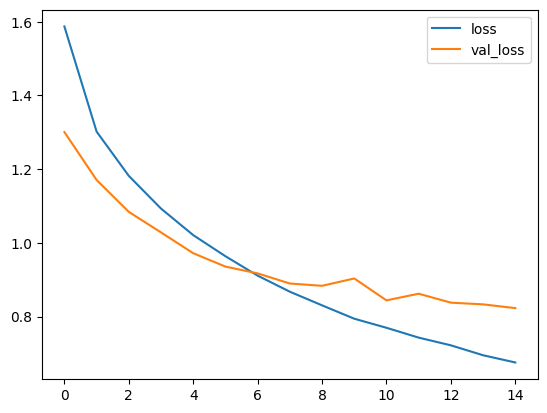

In [7]:
# plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

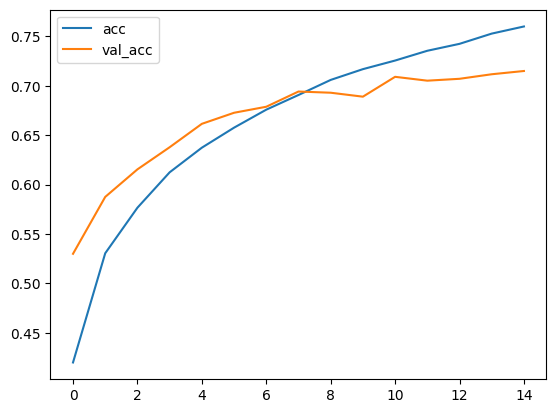

In [8]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, whitout normalization
[[739  17  37  31  23   7   9  15  81  41]
 [  9 790   9  15   2   5  16   7  27 120]
 [ 60   6 583  96  78  77  46  31  13  10]
 [ 13   4  49 610  39 198  34  35   7  11]
 [ 10   2  78  91 646  66  26  67  10   4]
 [ 10   3  40 204  33 659   7  32   6   6]
 [  4   4  39 112  44  53 727   7   7   3]
 [ 17   2  25  63  49  76   6 747   3  12]
 [ 48  24  11  19   8   7   6   8 846  23]
 [ 29  63   7  29   5  10   9  18  27 803]]


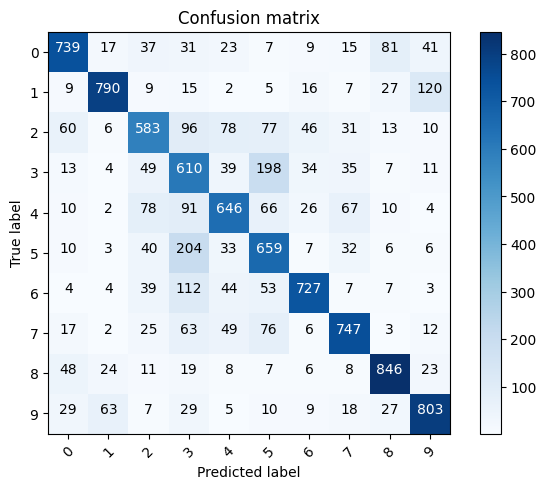

In [9]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting "normalize=True".
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, whitout normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment='center',
              color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm, list(range(10)))



In [10]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

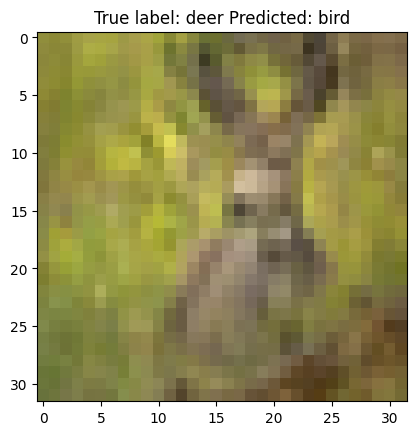

In [14]:
# show some missclassified examples
missclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));